
### This script plots histograms of objective function values fitting using differential evolution, basin hopping and Monte-Carlo methods.


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**RUN_0130**

In [2]:
full = h5py.File('/home/chen/ar46/MonteCarlo/chi_values/run_0130.h5', 'r')
orig_data = h5py.File('/home/chen/ar46/clean_events/clean_run_0130.h5', 'r')
proton_MC = h5py.File('/home/chen/ar46/MonteCarlo/proton_chi_values/run_0130_proton.h5', 'r')
proton_DE = h5py.File('/home/chen/ar46/DiffEvolution/run_0130_proton.h5', 'r')
proton_BH = h5py.File('/home/chen/ar46/Basinhopping/run_0130_proton.h5', 'r')
MC = h5py.File('/home/chen/ar46/MonteCarlo/chi_values/run_0130.h5', 'r')
DE = h5py.File('/home/chen/ar46/DiffEvolution/chi_values/with_cleaning/run_0130.h5', 'r')
BH = h5py.File('/home/chen/ar46/Basinhopping/chi_values/run_0130.h5', 'r')

#data set's names are: position, energy, total, vertex
dataset_name = '/total'
evt_full = MC[dataset_name]
print("# of clean events successfully processed - MC: " + str(len(evt_full)))

dataset_name = '/total'
evt_BH = BH[dataset_name]
print("# of clean events successfully processed - BH: " + str(len(evt_BH)))

dataset_name = '/total'
evt_DE = DE[dataset_name]
print("# of clean events successfully processed - DE: " + str(len(evt_DE)))

dataset_name = '/total'
proton_MC_full = proton_MC[dataset_name]
print("# of proton events successfully processed: " + str(len(proton_MC_full)))

dataset_name = '/total'
proton_DE_full = proton_DE[dataset_name]
print("# of proton events successfully processed: " + str(len(proton_DE_full)))

dataset_name = '/total'
proton_BH_full = proton_BH[dataset_name]
print("# of proton events successfully processed: " + str(len(proton_BH_full)))


# of clean events successfully processed - MC: 454
# of clean events successfully processed - BH: 455
# of clean events successfully processed - DE: 459
# of proton events successfully processed: 200
# of proton events successfully processed: 171
# of proton events successfully processed: 171


In [3]:
#creating arrays that contain all the objective function values for all the runs, fitted with each method

monte_carlo = np.empty((0,0))
proton_DE = np.empty((0,0))
proton_BH = np.empty((0,0))
proton_MC = np.empty((0,0))
differential_evolution = np.empty((0,0))
basinhopping = np.empty((0,0))

for i in range(10002):
    try:
        monte_carlo = np.append(monte_carlo, np.array(evt_full[str(i)]))
        differential_evolution = np.append(differential_evolution, np.array(evt_DE[str(i)]))
        basinhopping = np.append(basinhopping, np.array(evt_BH[str(i)]))

    except Exception:
        continue
for i in range(10002):
    try:
        proton_BH = np.append(proton_BH, np.array(proton_BH_full[str(i)]))
        proton_MC = np.append(proton_MC, np.array(proton_MC_full[str(i)]))
        proton_DE = np.append(proton_DE, np.array(proton_DE_full[str(i)]))
    except Exception:
        continue    
print(len(proton_MC))
#plt.hist(monte_carlo, label='All Events', bins=50, color='blue',range=(0,120)) 
#plt.hist(proton_MC, label='Proton Events', bins=50, color='red',range=(0,120))print(len(proton_MC))

171


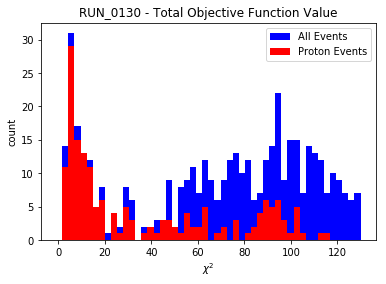

171 454


In [4]:
plt.hist(monte_carlo, label='All Events', bins=50, color='blue', range=(-1,130)) 
#plt.hist(MC, label='All Events', bins=50, color='blue', range=(-1,130)) 
#plt.hist(proton_MC, label='Proton Events', bins=50, color='red', range=(-1,130))
#plt.hist(proton_MC)
#plt.hist(monte_carlo, label='All Events', bins=50, color='blue',range=(0,120)) 
plt.hist(proton_MC, label='Proton Events', bins=50, color='red',range=(-1,130))
#plt.hist(basinhopping, label='less cut', bins=50, color='cyan',range=(0,40))
#plt.hist(proton_BH, label='Cleaned Data', bins=50, color='orange',range=(0,120))
#plt.hist(basinhopping, label='less cut', bins=50, color='cyan',range=(0,40))
#plt.hist(proton_DE, label='more cut', bins=50, color='orange',range=(0,40))
plt.legend(loc=1)
plt.title('RUN_0130 - Total Objective Function Value')
plt.xlabel('$\chi^2$')
plt.ylabel('count')
plt.show()
print(len(proton_MC), len(monte_carlo))

In [15]:
all_below40 = 0
p_below40 = 0
all_cut = 0
p_cut = 0
for i in monte_carlo:
    if i <= 40:
        all_below40 += 1
    else:
        all_cut += 1
    
        
for i in proton_MC:
    if i <= 40:
        p_below40 += 1
    else:
        p_cut += 1
        
print(all_below40,p_below40)
print(all_cut, p_cut)

FP = all_below40 - p_below40
TP = p_below40
FN = p_cut
TN = all_cut - p_cut
print("Confusion matrix:")
print(np.array([[TP,FP],[FN,TN]]))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("precision =", precision, "recall =", recall)
print("F1 =", 2*precision*recall/(precision+recall))

124 105
330 66
Confusion matrix:
[[105  19]
 [ 66 264]]
precision = 0.8467741935483871 recall = 0.6140350877192983
F1 = 0.711864406779661
